# 2. Data Exploration

In [1]:
!pip install plotly

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd

financials = pd.read_csv('/content/drive/MyDrive/Dissertation_Final /Data/Raw/sp500_financials.csv')
financials = financials.drop('Unnamed: 0', axis=1) #dropping the past index

target = pd.read_csv('/content/drive/MyDrive/Dissertation_Final /Data/Raw/sp500_target_variables.csv')
general = pd.read_csv('/content/drive/MyDrive/Dissertation_Final /Data/Raw/sp500_general.csv')

df = pd.read_csv('/content/drive/MyDrive/Dissertation_Final /Data/Raw/sp500_financial_and_target.csv') #financial and target

## S&P 500

In [ ]:
# calculate percentage of NaN values in each column
nan_percent = general.isna().mean() * 100
print(nan_percent)

Instrument                  0.000000
Company Common Name         0.000000
Country of Headquarters     0.000000
TRBC Industry Group Name    0.000000
GICS Sector Name            1.775148
Currency                    0.197239
dtype: float64


In [ ]:
general.describe()

,Instrument,Company Common Name,Country of Headquarters,TRBC Industry Group Name,GICS Sector Name,Currency
count,507,507,507,507,498,506
unique,507,502,7,48,11,1
top,POOL.OQ,Warner Bros Discovery Inc,United States of America,Software & IT Services,Industrials,USD
freq,1,2,483,45,74,506


### Financial features

In [6]:
# calculate percentage of NaN values in each column
nan_percent = df.isna().mean() * 100
print(nan_percent)

Instrument                                                       0.000000
Date                                                             9.974641
Revenue                                                         10.115526
Gross Profit                                                    16.859209
EBIT                                                             0.497793
EBITDA                                                           0.535362
Total Assets                                                     0.413262
Total Liabilities                                                0.413262
Enterprise Value (Daily Time Series)                             0.911055
Free Cash Flow                                                   0.732601
P/E (Daily Time Series Ratio)                                    8.603362
Dividend yield                                                  23.480793
Net Profit Margin, (%)                                           0.347516
Current Ratio                         

In [7]:
#the general industry stats
#lseg sits around 3.5 k revenue
financials.describe()

,Revenue,Gross Profit,EBIT,EBITDA,Total Assets,Total Liabilities,Enterprise Value (Daily Time Series),Free Cash Flow,P/E (Daily Time Series Ratio),Dividend yield,"Net Profit Margin, (%)",Current Ratio,Quick Ratio,Debt - Total,"Weighted Average Cost of Capital, (%)",Common Shares - Outstanding - Total
count,1.064700e+04,1.064700e+04,1.064700e+04,1.064700e+04,1.064700e+04,1.064700e+04,1.064700e+04,1.064700e+04,10647.000000,10647.000000,10647.000000,10647.000000,10647.000000,1.064700e+04,10647.000000,1.064700e+04
mean,2.195693e+10,8.314826e+09,2.979863e+09,4.080985e+09,5.915308e+10,4.606886e+10,5.968583e+10,1.098621e+09,41.612799,2.161637,12.000028,1.451311,1.172990,1.317319e+10,6.939800,6.940820e+08
std,4.365391e+10,1.582621e+10,6.147611e+09,7.623391e+09,1.874097e+11,1.677845e+11,1.276629e+11,4.374190e+09,206.967045,1.488008,31.977457,1.723779,1.416596,3.664677e+10,2.523473,1.504341e+09
min,4.540963e+07,-3.793616e+09,-8.302512e+09,-6.449952e+09,1.251823e+08,4.918868e+07,-5.671807e+10,-3.377692e+10,0.008804,-9.609488,-853.727850,-21.551197,-16.541354,-4.459517e+08,-0.662251,-1.218064e+08
25%,3.639501e+09,1.708455e+09,5.893508e+08,8.620368e+08,7.267827e+09,4.254336e+09,1.359776e+10,9.620441e+07,16.455875,1.228501,6.206770,0.972220,0.706710,1.893680e+09,5.450121,1.517103e+08
50%,8.442074e+09,3.320739e+09,1.248852e+09,1.774083e+09,1.646070e+10,1.058913e+10,2.503668e+10,4.485238e+08,25.446632,2.001734,11.410470,1.363600,1.074740,4.840123e+09,7.035786,3.126994e+08
75%,1.916390e+10,7.529933e+09,2.768639e+09,3.968784e+09,4.259441e+10,2.939645e+10,5.166975e+10,1.220072e+09,41.331576,2.831870,19.378630,1.828080,1.462290,1.109760e+10,8.517426,6.240000e+08
max,4.961772e+11,1.861219e+11,1.100194e+11,1.202478e+11,3.030286e+12,2.788630e+12,2.214589e+12,7.862752e+10,17025.486251,14.099217,160.935570,12.915690,12.915690,4.484618e+11,22.762416,2.050480e+10


In [8]:
#the general industry stats
# potresti dare un occhio al percentile
df.groupby('Instrument').mean()

<ipython-input-8-e0ba70570a76>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Instrument').mean()


,Revenue,Gross Profit,EBIT,EBITDA,Total Assets,Total Liabilities,Enterprise Value (Daily Time Series),Free Cash Flow,P/E (Daily Time Series Ratio),Dividend yield,"Net Profit Margin, (%)",Current Ratio,Quick Ratio,Debt - Total,"Weighted Average Cost of Capital, (%)",Common Shares - Outstanding - Total,Enterprise Value To EBITDA (Daily Time Series Ratio),P/E (Daily Time Series Ratio).1,Forward P/E (Daily Time Series Ratio),Forward Enterprise Value To EBITDA (Daily Time Series Ratio)
Instrument,,,,,,,,,,,,,,,,,,,,
A.N,4.331872e+09,2.341708e+09,9.364461e+08,1.148085e+09,7.488173e+09,3.632715e+09,2.631406e+10,6.685104e+08,33.761275,0.730922,17.600883,2.389404,1.914362,1.838749e+09,8.219442,3.080476e+08,21.927651,33.761275,25.655327,19.784172
AAL.OQ,2.863492e+10,1.683293e+10,-7.387938e+08,1.160211e+09,4.702309e+10,4.979511e+10,2.662228e+10,-1.343342e+09,21.348569,0.595150,-9.219151,0.635750,0.540358,2.302429e+10,6.599944,5.492869e+08,10.019696,21.348569,10.472538,357.254060
AAP.N,7.676398e+09,3.395763e+09,5.664269e+08,7.581519e+08,8.203382e+09,5.645738e+09,8.633829e+09,2.618861e+08,23.205521,1.465831,4.716920,1.352925,0.338744,7.737823e+08,8.064549,6.764695e+07,11.109338,23.205521,16.156084,9.459945
AAPL.OQ,2.393036e+11,9.584757e+10,6.542812e+10,7.431986e+10,2.763184e+11,2.118801e+11,1.452615e+12,4.503638e+10,25.271042,0.915654,22.960171,1.220716,1.180314,9.201821e+10,8.482910,1.760122e+10,18.788952,25.271042,22.600966,17.570903
ABBV.N,3.151582e+10,2.267382e+10,1.106049e+10,1.454451e+10,8.168058e+10,7.821800e+10,1.873374e+11,3.425795e+09,25.297260,4.862971,18.421836,1.378202,1.274066,4.732137e+10,6.169229,1.632361e+09,12.112978,25.297260,9.979716,9.845214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM.N,4.527780e+09,2.262045e+09,1.426760e+09,1.576841e+09,4.045069e+09,1.002664e+10,3.296111e+10,6.228925e+08,25.137019,1.771734,23.105325,1.092657,1.091428,8.068123e+09,6.530278,3.017143e+08,20.555795,25.137019,24.707364,18.573397
ZBH.N,5.517375e+09,3.939914e+09,9.728320e+08,1.715186e+09,1.825479e+10,9.120430e+09,2.647584e+10,4.295579e+08,73.351908,0.736218,3.655714,1.647970,0.841402,6.160716e+09,7.409877,2.062952e+08,15.520659,73.351908,16.801730,12.693639
ZBRA.OQ,3.534607e+09,1.633871e+09,5.504011e+08,6.922038e+08,3.993148e+09,2.507496e+09,1.362503e+10,4.691278e+08,32.005375,NaN,10.293860,0.870733,0.525204,1.128685e+09,10.107084,5.341034e+07,18.557557,32.005375,19.366327,15.443468


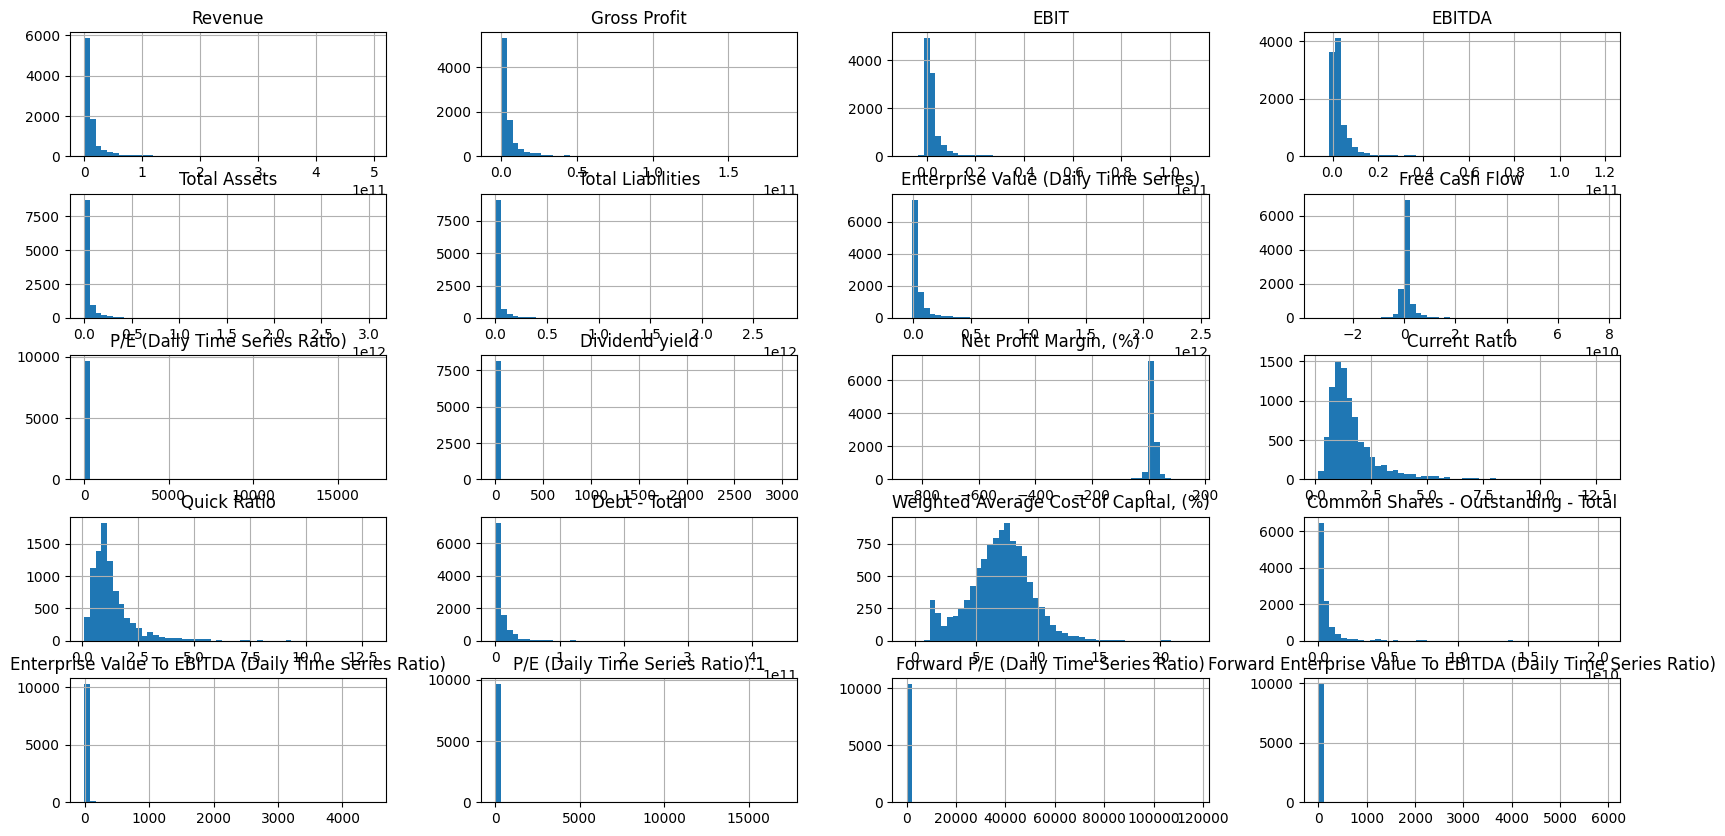

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,10))
plt.show()

In [12]:
import plotly.graph_objects as go

# Compute the correlation matrix
corr_matrix = financials.corr()

# Create the heatmap
fig = go.Figure(go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns.tolist(),
    y=corr_matrix.index.tolist(),
    showscale=True
))

fig.update_layout(title='Correlation Matrix Heatmap')
fig.show()

<ipython-input-12-241835d3f990>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [14]:
import plotly.graph_objects as go

# Compute the correlation matrix
corr_matrix = df.corr()

# Create the heatmap
fig = go.Figure(go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns.tolist(),
    y=corr_matrix.index.tolist(),
    showscale=True
))

fig.update_layout(title='Correlation Matrix Heatmap', xaxis_tickangle=-45)
fig.show()

<ipython-input-14-8972edc967f2>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



### Target varibles

In [15]:
# calculate percentage of NaN values in each column
nan_percent = target.isna().mean() * 100
print(nan_percent)

Instrument                                                       0.000000
Forward Enterprise Value To EBITDA (Daily Time Series Ratio)     5.743903
Enterprise Value To EBITDA (Daily Time Series Ratio)             1.450841
EV / Free Cash Flow (SmartEstimate ®)                           18.158304
P/E (Daily Time Series Ratio)                                    6.909332
Forward P/E (Daily Time Series Ratio)                            1.610394
dtype: float64


In [16]:
#the general industry stats
target.describe()

,Forward Enterprise Value To EBITDA (Daily Time Series Ratio),Enterprise Value To EBITDA (Daily Time Series Ratio),EV / Free Cash Flow (SmartEstimate ®),P/E (Daily Time Series Ratio),Forward P/E (Daily Time Series Ratio)
count,95111.000000,99443.000000,82584.000000,93935.000000,99282.000000
mean,13.576601,17.197832,40.557047,34.183777,22.979961
std,7.670005,27.704428,261.557427,84.282439,181.786673
min,-13.209148,-8.616668,3.736802,0.003175,0.004533
25%,9.011388,9.108628,17.385626,14.113390,11.968420
50%,12.255102,13.460452,24.334892,22.088631,17.561322
75%,16.691323,18.703482,34.544105,32.743368,24.173755
max,231.133631,769.369673,32355.162971,2484.061281,52393.023544


In [17]:
#the general industry stats
# potresti dare un occhio al percentile
target.groupby('Instrument').mean()

,Forward Enterprise Value To EBITDA (Daily Time Series Ratio),Enterprise Value To EBITDA (Daily Time Series Ratio),EV / Free Cash Flow (SmartEstimate ®),P/E (Daily Time Series Ratio),Forward P/E (Daily Time Series Ratio)
Instrument,,,,,
A.N,19.868331,21.705837,36.440667,32.181754,24.391221
AAL.OQ,7.044854,20.941452,327.661516,85.534777,11.258308
AAP.N,7.380279,9.589867,20.604796,18.018293,11.557918
AAPL.OQ,18.988350,19.458840,23.939191,25.454950,24.079838
ABBV.N,12.050285,11.530687,15.618302,22.503833,12.957882
...,...,...,...,...,...
YUM.N,18.245648,20.873118,34.310025,27.401756,24.145951
ZBH.N,12.172489,14.862510,26.249764,74.671806,17.118494
ZBRA.OQ,12.701375,14.669507,29.847646,32.302330,15.609212


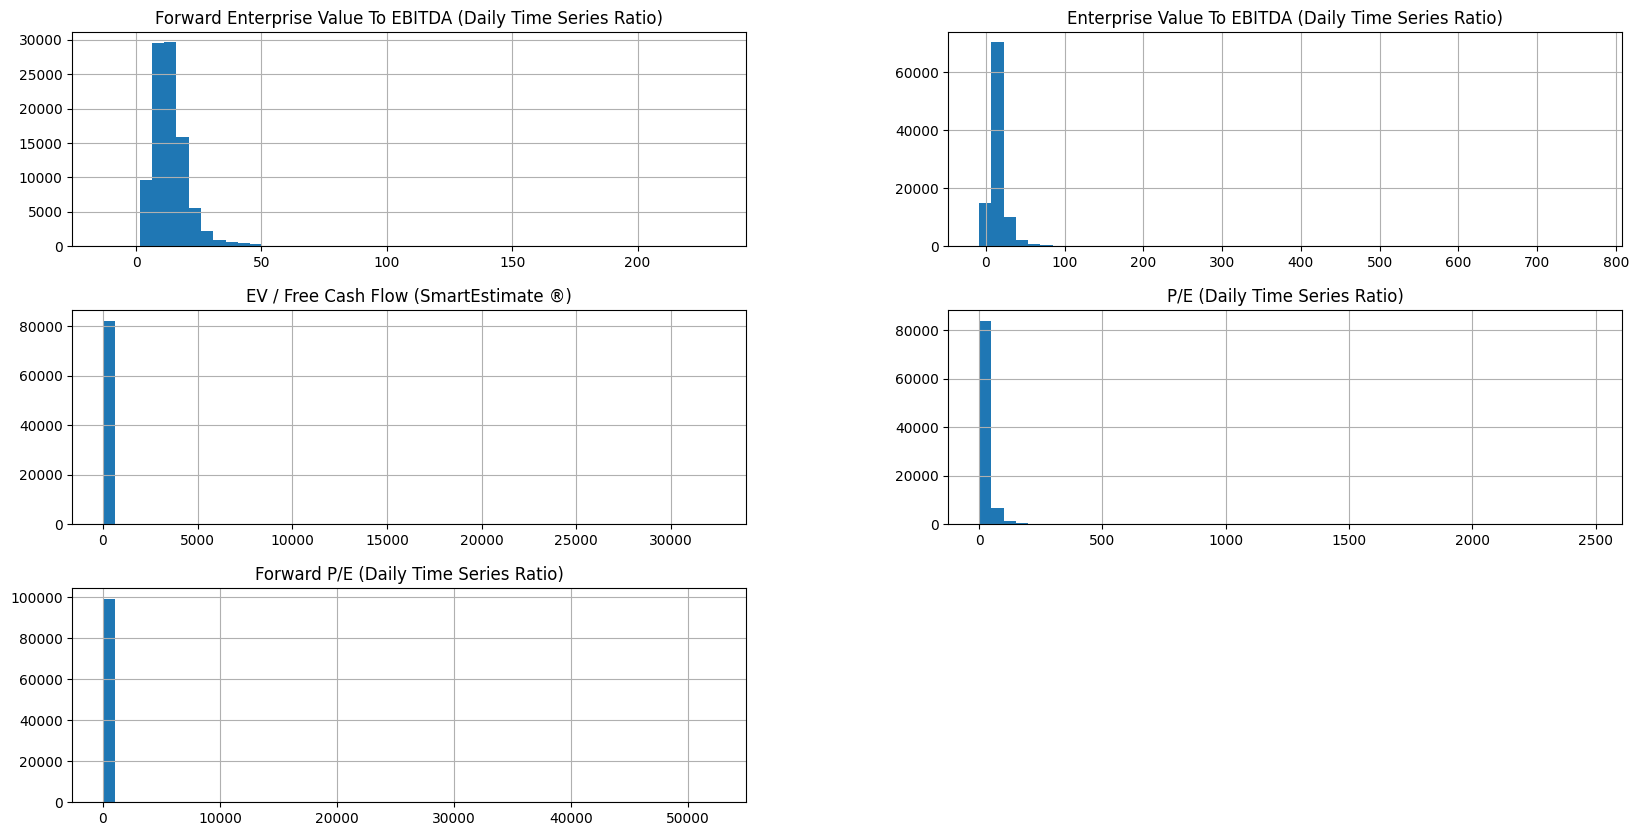

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
target.hist(bins=50, figsize=(20,10))
plt.show()

In [ ]:
import plotly.graph_objects as go

# Compute the correlation matrix
corr_matrix = target.corr()

# Create the heatmap
fig = go.Figure(go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns.tolist(),
    y=corr_matrix.index.tolist(),
    showscale=True
))

fig.update_layout(title='Correlation Matrix Heatmap')
fig.show()

<ipython-input-30-7dcfcd30dade>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



## LSEG and Peers

In [ ]:
import pandas as pd

financials = pd.read_csv('/content/drive/MyDrive/Dissertation_Final /Data/Raw/lseg_financials (1).csv')
target = pd.read_csv('/content/drive/MyDrive/Dissertation_Final /Data/Raw/lseg_target_variables.csv')
general = pd.read_csv('/content/drive/MyDrive/Dissertation_Final /Data/Raw/lseg_general.csv')

In [ ]:
general.describe()

,Instrument,Company Common Name,Country of Headquarters,TRBC Industry Group Name,GICS Sector Name,Currency
count,15,15,15,15,15,15
unique,15,15,4,3,2,4
top,LSEG.L,London Stock Exchange Group PLC,United States of America,Investment Banking & Investment Services,Financials,USD
freq,1,1,12,8,14,12


In [ ]:
# calculate percentage of NaN values in each column
nan_percent = general.isna().mean() * 100
print(nan_percent)

Instrument                  0.0
Company Common Name         0.0
Country of Headquarters     0.0
TRBC Industry Group Name    0.0
GICS Sector Name            0.0
Currency                    0.0
dtype: float64


In [ ]:
#the general industry stats
# potresti dare un occhio al percentile
financials.groupby('Instrument').mean()

<ipython-input-51-58f51991fe72>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Revenue,Gross Profit,EBIT,EBITDA,Total Assets,Total Liabilities,Enterprise Value (Daily Time Series),Free Cash Flow,P/E (Daily Time Series Ratio),Dividend yield,"Net Profit Margin, (%)",Current Ratio,Quick Ratio,Debt - Total,"Weighted Average Cost of Capital, (%)",Common Shares - Outstanding - Total
Instrument,,,,,,,,,,,,,,,,
0388.HK,1.503383e+09,NaN,9.847481e+08,1.090811e+09,3.280055e+10,2.840309e+10,1.910878e+10,3.115240e+08,39.670182,2.333215,65.718158,1.089923,1.089923,2.187177e+08,11.865250,1.259292e+09
CBOE.K,2.288773e+09,9.699574e+08,5.099631e+08,6.448934e+08,4.504084e+09,1.959975e+09,1.001870e+10,2.781633e+08,33.457685,1.475510,13.098188,1.392462,1.392462,9.247746e+08,4.729350,1.092832e+08
CME.O,3.797239e+09,NaN,2.316033e+09,2.590706e+09,8.916977e+10,6.952074e+10,5.435250e+10,4.627189e+08,26.951006,1.820707,52.920397,1.016786,1.016786,2.711173e+09,4.520338,3.552208e+08
DB1GnEUR.xbo,3.225891e+09,2.735063e+09,1.427708e+09,1.630893e+09,1.512817e+11,1.457006e+11,2.778773e+10,5.441875e+08,24.313815,2.053111,28.563189,1.014873,1.014873,3.620096e+09,3.384264,1.839511e+08
EEFT.O,2.043977e+09,8.086807e+08,2.375107e+08,3.269451e+08,3.276674e+09,2.262736e+09,4.546273e+09,1.305416e+08,391.537200,NaN,6.217093,1.657000,1.647291,8.337829e+08,8.387113,5.227424e+07
FDS,1.203780e+09,7.396629e+08,3.694191e+08,4.200727e+08,1.767999e+09,1.078086e+09,1.003887e+10,2.034083e+08,34.487076,0.963014,23.408515,2.497978,2.497978,6.819212e+08,6.827447,3.804888e+07
ICE,5.693207e+09,4.402121e+09,2.262421e+09,2.823744e+09,9.582771e+10,8.126004e+10,5.210283e+10,1.546584e+09,25.791325,1.258817,30.618693,1.002129,1.002129,8.569188e+09,5.623558,5.641429e+08
LSEG.L,3.509095e+09,3.090476e+09,9.953810e+08,1.699429e+09,8.137749e+11,8.045017e+11,3.559651e+10,6.002857e+08,67.303218,1.076499,15.785543,1.001562,1.001562,3.676000e+09,5.493619,3.987101e+08
MCO,3.855693e+09,2.778905e+09,1.681241e+09,1.848252e+09,8.730790e+09,7.657690e+09,4.199333e+10,9.754261e+08,31.146465,0.892146,30.769799,1.709384,1.709384,4.755076e+09,8.107235,1.879146e+08


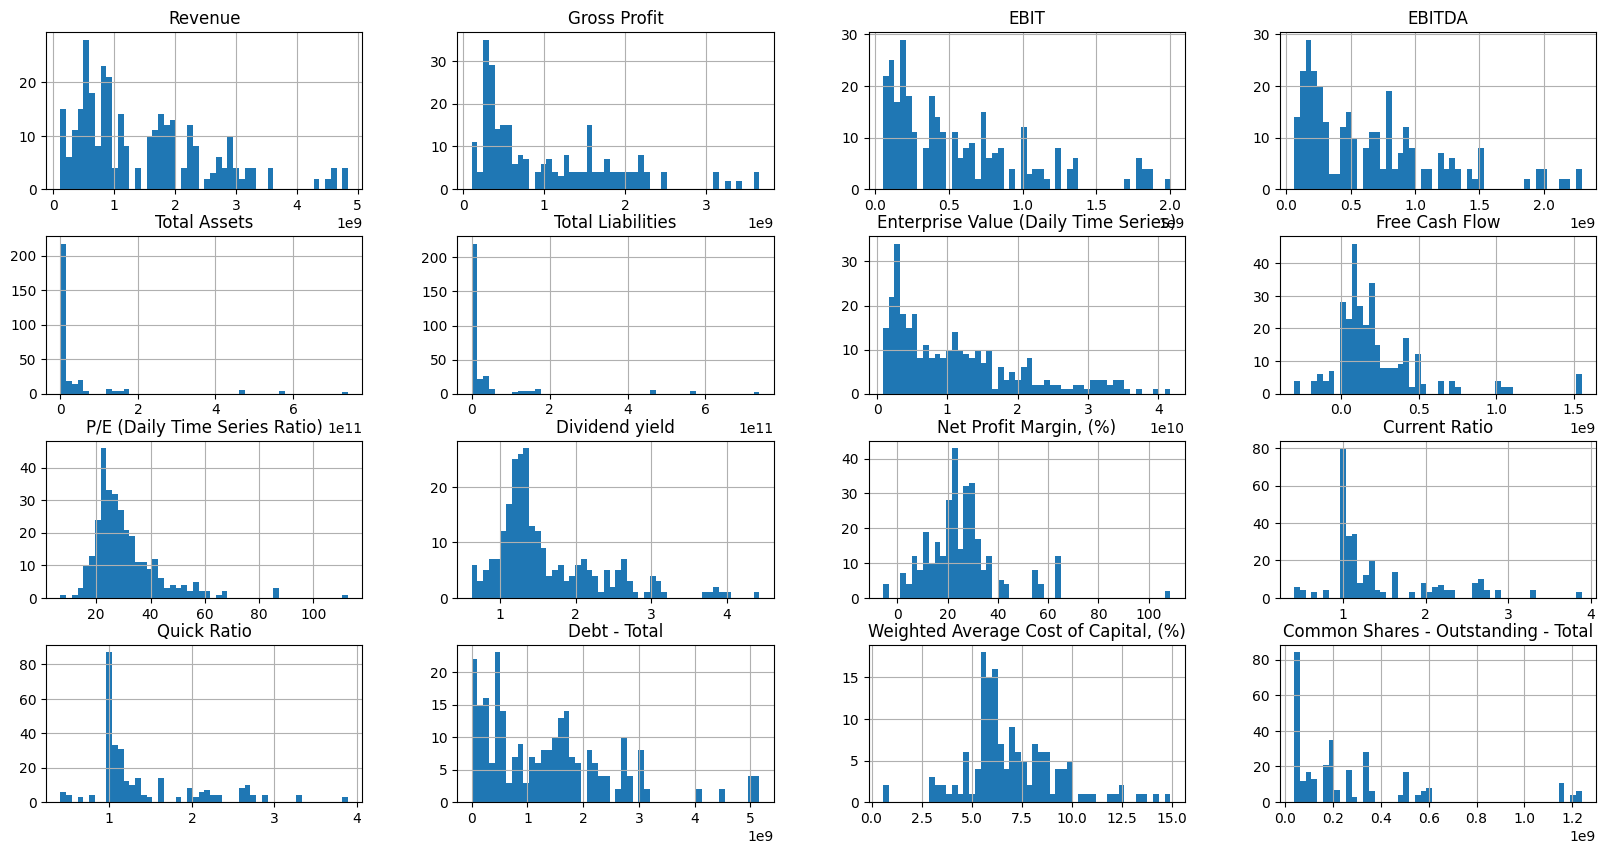

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
financials.hist(bins=50, figsize=(20,10))
plt.show()

In [ ]:
import plotly.graph_objects as go

# Compute the correlation matrix
corr_matrix = financials.corr()

# Create the heatmap
fig = go.Figure(go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns.tolist(),
    y=corr_matrix.index.tolist(),
    showscale=True
))

fig.update_layout(title='Correlation Matrix Heatmap')
fig.show()

<ipython-input-36-241835d3f990>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

# Define the color groups
blue = ['ICE', 'NDAQ.O', 'EEFT.O', 'CME.O', 'CBOE.K', '0388.HK', 'DB1GnEUR.xbo', 'MKTX.O'] #exchangee
yellow = ['MCO', 'MORN.O', 'SPGI.K', 'MSCI.K', 'VRSK.O', 'FDS'] #data
red = ['LSEG.L']

# Combine the groups to create the hue_order and palette
hue_order = blue + yellow + red
palette = ['#1f77b4'] * len(blue) + ['#ffcc00'] * len(yellow) + ['#d62728'] * len(red)

In [23]:
financials.dtypes

Instrument                                object
Date                                      object
Revenue                                  float64
Gross Profit                             float64
EBIT                                     float64
EBITDA                                   float64
Total Assets                             float64
Total Liabilities                        float64
Enterprise Value (Daily Time Series)     float64
Free Cash Flow                           float64
P/E (Daily Time Series Ratio)            float64
Dividend yield                           float64
Net Profit Margin, (%)                   float64
Current Ratio                            float64
Quick Ratio                              float64
Debt - Total                             float64
Weighted Average Cost of Capital, (%)    float64
Common Shares - Outstanding - Total      float64
dtype: object

In [24]:
# Create the color_map dictionary
color_map = {instrument: color for instrument, color in zip(hue_order, palette)}

In [25]:
# Calculate the average value for each financial variable by instrument
mean_values = financials.groupby('Instrument').mean().reset_index()
numerical_columns = financials.select_dtypes(include='float64').columns


# Create a bar plot for each numerical column
for column in numerical_columns:
    fig = px.bar(mean_values, x='Instrument', y=column, color='Instrument', color_discrete_map=color_map, title=f'Average {column} by Instrument')
    fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Calculate the average value for each financial variable by instrument and date
mean_values_by_date = financials.groupby(['Instrument', 'Date'])[numerical_columns].mean().reset_index()

# Create line plots for each numerical column
for column in numerical_columns:
    fig = px.line(mean_values_by_date, x='Date', y=column, color='Instrument', color_discrete_map=color_map, title=f'Average {column} by Instrument Over Time', markers=True)
    fig.show()

Clustering to describe

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

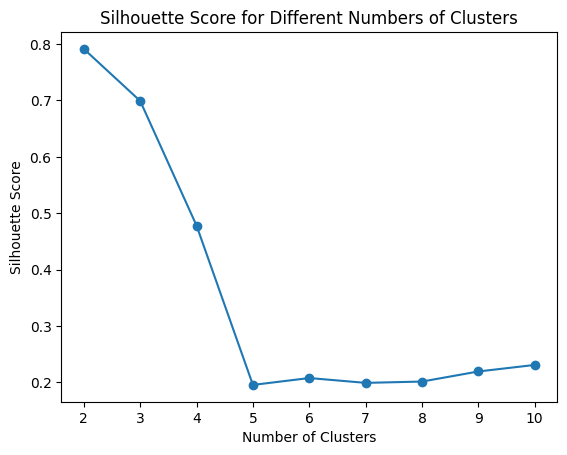

In [26]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, silhouette_samples

df = financials

# Preprocess the data: group by instrument and compute the mean
mean_values = df.groupby('Instrument')[numerical_columns].mean()

# Fill NaN values with column averages
mean_values_filled = mean_values.fillna(mean_values.mean())

# Scale the data
scaler = StandardScaler()
scaled_mean_values = scaler.fit_transform(mean_values_filled)

# Define a range of number of clusters to try
min_clusters = 2
max_clusters = 10
range_n_clusters = range(min_clusters, max_clusters + 1)

# Compute silhouette scores for different number of clusters
silhouette_scores = []
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_mean_values)
    silhouette_avg = silhouette_score(scaled_mean_values, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xticks(range_n_clusters)
plt.show()

In [27]:
# Preprocess the data: group by instrument and compute the mean
mean_values = df.groupby('Instrument')[numerical_columns].mean()

# Fill NaN values with column averages
mean_values_filled = mean_values.fillna(mean_values.mean())

# Scale the data
scaler = StandardScaler()
scaled_mean_values = scaler.fit_transform(mean_values_filled)

# Apply K-means clustering
n_clusters = 3  # Define the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_mean_values)

# Add the cluster labels to the DataFrame
mean_values_filled['Cluster'] = cluster_labels

# Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_mean_values)
mean_values_filled['PCA1'] = pca_result[:, 0]
mean_values_filled['PCA2'] = pca_result[:, 1]

# Plot the clusters
fig = px.scatter(mean_values_filled.reset_index(), x='PCA1', y='PCA2', color='Cluster', text='Instrument', title='K-means Clustering of Companies')
fig.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

